read file

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

loading traning dataset

In [48]:
df = pd.read_csv("dataset/ETH-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
1,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
2,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
3,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
4,2015-08-12,1.058750,1.289940,0.883608,1.217440,1.217440,2.150620e+06
...,...,...,...,...,...,...,...
2115,2021-05-23,2298.367188,2384.411621,1737.468750,2109.579834,2109.579834,5.600572e+10
2116,2021-05-24,2099.936035,2672.595703,2090.639648,2643.591064,2643.591064,5.369712e+10
2117,2021-05-25,2649.033203,2750.534912,2394.355469,2706.628906,2706.628906,4.955833e+10
2118,2021-05-26,2707.052734,2911.735596,2652.094482,2888.698730,2888.698730,4.249977e+10


Little Visualise

<Axes: xlabel='Date'>

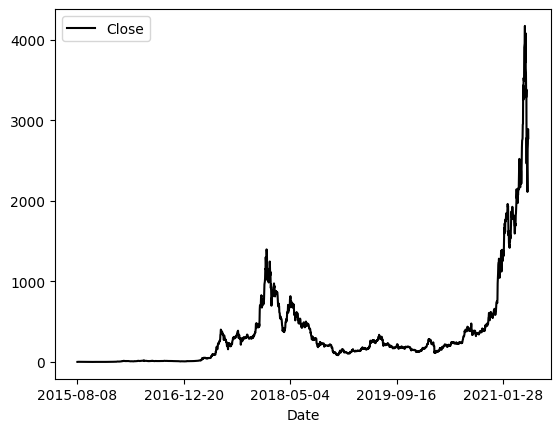

In [24]:
df.plot.line(y="Close",x="Date",color="black")

remove unnecessary


In [25]:
df = df.drop(["Volume","High","Low","Open","Adj Close"],axis=1)

In [26]:
df.loc[0:1]

,Date,Close
0,2015-08-08,0.753325
1,2015-08-09,0.701897


Ensure Date: Type[DateTime Object] Instead of [object]

In [50]:
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2120 entries, 0 to 2119
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
2120 non-null   object
dtypes: object(1)
memory usage: 16.7+ KB


InCase Date: Type[Str] function which convert date into Datetime Object

In [28]:
# import datetime 
# df["Date"] = [dt.strftime('%Y-%m-%d') for dt in df["Date"]]   # Conversion Datetime into Str For Education 
# df["Date"].info()

In [51]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)
# print(str_to_datetime("1999-05-25"))


In [52]:
df["Date"]=df["Date"].apply(str_to_datetime)
# df["Date"] = [str_to_datetime(s) for s in df["Date"]]

In [53]:
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2120 entries, 0 to 2119
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
2120 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.7 KB


making df["Date] Index

In [32]:
df.index = df.pop('Date')


In [33]:
df.head()

,Close
Date,
2015-08-08,0.753325
2015-08-09,0.701897
2015-08-10,0.708448
2015-08-11,1.067860
2015-08-12,1.217440


In [66]:
df["Close"].isna().sum()
df['Close'] = df['Close'].fillna(method='ffill')


C:\Users\shiva\AppData\Local\Temp\ipykernel_17664\697863065.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close'] = df['Close'].fillna(method='ffill')


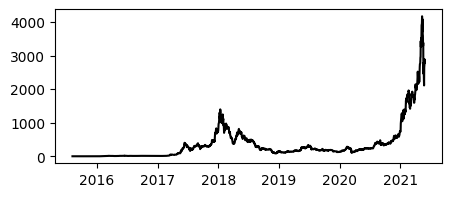

In [151]:
plt.figure(figsize=(5,2))
plt.plot(df.index,df["Close"],'black')
plt.show()

inistialising linear regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score

In [37]:
df.reset_index()

,Date,Close
0,2015-08-08,0.753325
1,2015-08-09,0.701897
2,2015-08-10,0.708448
3,2015-08-11,1.067860
4,2015-08-12,1.217440
...,...,...
2115,2021-05-23,2109.579834
2116,2021-05-24,2643.591064
2117,2021-05-25,2706.628906
2118,2021-05-26,2888.698730


In [68]:
df['date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)
X = df[['date_ordinal']]
y = df["Close"]

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5)

In [112]:
model = LinearRegression()

In [113]:
model.fit(X_train,y_train)

LinearRegression()

In [114]:
y_pred = model.predict(X_test)

In [115]:
mse = mean_squared_error(y_test,y_pred)
mse

178830.07035252047

In [116]:
r2 = r2_score(y_test,y_pred)
r2

0.30221584160267956

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Convert 'Date' to ordinal
df['date_ordinal'] = df.index.map(pd.Timestamp.toordinal)

# Features and Target
X = df[['date_ordinal']]
y = df["Close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 672.9128589545675
R² Score: 0.9965226642501286


In [132]:
y_pred

array([1.12536918e+02, 1.12148600e+01, 2.19394055e+02, 2.15349136e+02,
       9.20926125e+01, 1.40599460e+01, 1.08372420e+01, 2.43840690e+02,
       7.65892400e+00, 8.47482293e+02, 1.19292150e+01, 1.89150843e+02,
       1.40604917e+02, 2.63250805e+02, 1.83315653e+03, 1.28769595e+02,
       1.64885774e+02, 2.77225228e+02, 2.08273778e+03, 6.77491160e-01,
       1.36620764e+02, 6.54728477e+02, 4.14185120e+00, 8.22626410e+00,
       1.90234193e+03, 1.27826570e+01, 6.36539636e+02, 1.32803878e+02,
       2.80009422e+02, 1.67709810e+02, 2.60935408e+02, 7.34102010e+02,
       2.95696982e+02, 2.07724452e+02, 1.21416011e+03, 5.91384378e+02,
       1.24979800e+01, 1.22215362e+02, 1.37228971e+02, 1.12554420e+01,
       1.17560275e+02, 4.87160690e+02, 1.18534440e+01, 2.63295112e+02,
       2.60558880e+02, 1.06460263e+02, 2.14348663e+02, 3.67591073e+02,
       2.86389584e+02, 1.22807960e+01, 1.99390202e+02, 5.57610900e+00,
       3.54183874e+02, 9.47806980e+00, 3.24590285e+01, 2.15805952e+02,
      

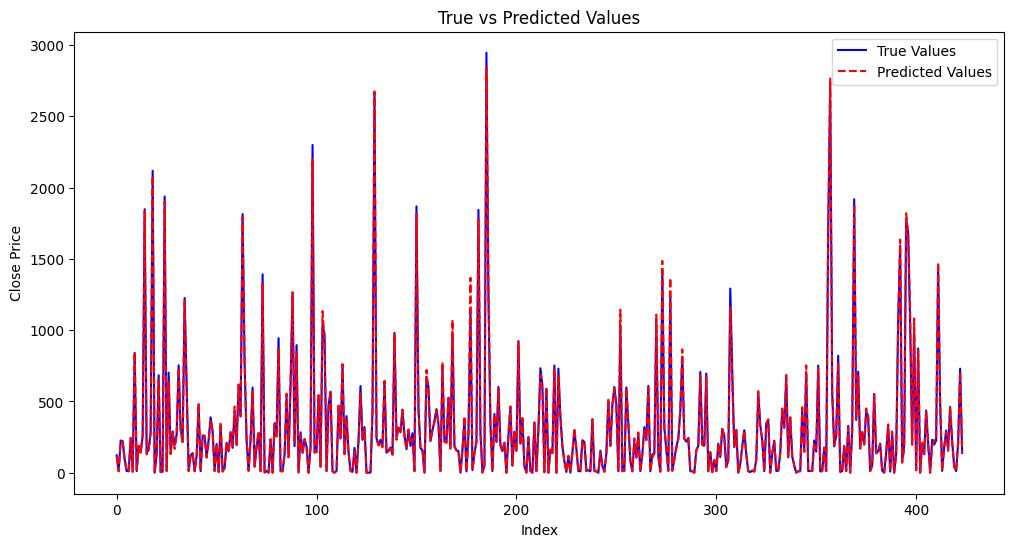

In [135]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--')

# Adding title and labels
plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()


Code to Convert Predicted Array into a DataFrame with Date Index

In [ ]:
import pandas as pd

# Create a DataFrame for predicted values with the same index as y_test
predicted_df = pd.DataFrame(y_pred, index=y_test.index, columns=['Predicted Close'])

# Optional: Round the predicted values to match the format of the actual Close prices
predicted_df['Predicted Close'] = predicted_df['Predicted Close'].round(2)

# Display the result
print(predicted_df.head())


            Predicted Close
Date                       
2018-11-28           112.54
2016-10-28            11.21
2019-08-07           219.39
2019-09-19           215.35
2018-12-09            92.09


In [141]:
X_train.tail()

,date_ordinal
Date,
2018-03-25,736778
2018-01-29,736723
2018-08-08,736914
2016-03-30,736053
2018-07-04,736879
